In [1]:
!pip3 install pandas
!pip install numpy
!pip install matplotlib
!pip install plotly_express==0.4.0

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
#Hurrican Informations as Lists
# names of hurricanes
names = ['Cuba I', 'San Felipe II Okeechobee', 'Bahamas', 'Cuba II', 'CubaBrownsville', 'Tampico', 'Labor Day', 'New England', 'Carol', 'Janet', 'Carla', 'Hattie', 'Beulah', 'Camille', 'Edith', 'Anita', 'David', 'Allen', 'Gilbert', 'Hugo', 'Andrew', 'Mitch', 'Isabel', 'Ivan', 'Emily', 'Katrina', 'Rita', 'Wilma', 'Dean', 'Felix', 'Matthew', 'Irma', 'Maria', 'Michael']

# months of hurricanes
months = ['October', 'September', 'September', 'November', 'August', 'September', 'September', 'September', 'September', 'September', 'September', 'October', 'September', 'August', 'September', 'September', 'August', 'August', 'September', 'September', 'August', 'October', 'September', 'September', 'July', 'August', 'September', 'October', 'August', 'September', 'October', 'September', 'September', 'October']

# years of hurricanes
years = [1924, 1928, 1932, 1932, 1933, 1933, 1935, 1938, 1953, 1955, 1961, 1961, 1967, 1969, 1971, 1977, 1979, 1980, 1988, 1989, 1992, 1998, 2003, 2004, 2005, 2005, 2005, 2005, 2007, 2007, 2016, 2017, 2017, 2018]

# maximum sustained winds (mph) of hurricanes
max_sustained_winds = [165, 160, 160, 175, 160, 160, 185, 160, 160, 175, 175, 160, 160, 175, 160, 175, 175, 190, 185, 160, 175, 180, 165, 165, 160, 175, 180, 185, 175, 175, 165, 180, 175, 160]

# areas affected by each hurricane
areas_affected = [['Central America', 'Mexico', 'Cuba', 'Florida', 'The Bahamas'], ['Lesser Antilles', 'The Bahamas', 'United States East Coast', 'Atlantic Canada'], ['The Bahamas', 'Northeastern United States'], ['Lesser Antilles', 'Jamaica', 'Cayman Islands', 'Cuba', 'The Bahamas', 'Bermuda'], ['The Bahamas', 'Cuba', 'Florida', 'Texas', 'Tamaulipas'], ['Jamaica', 'Yucatn Peninsula'], ['The Bahamas', 'Florida', 'Georgia', 'The Carolinas', 'Virginia'], ['Southeastern United States', 'Northeastern United States', 'Southwestern Quebec'], ['Bermuda', 'New England', 'Atlantic Canada'], ['Lesser Antilles', 'Central America'], ['Texas', 'Louisiana', 'Midwestern United States'], ['Central America'], ['The Caribbean', 'Mexico', 'Texas'], ['Cuba', 'United States Gulf Coast'], ['The Caribbean', 'Central America', 'Mexico', 'United States Gulf Coast'], ['Mexico'], ['The Caribbean', 'United States East coast'], ['The Caribbean', 'Yucatn Peninsula', 'Mexico', 'South Texas'], ['Jamaica', 'Venezuela', 'Central America', 'Hispaniola', 'Mexico'], ['The Caribbean', 'United States East Coast'], ['The Bahamas', 'Florida', 'United States Gulf Coast'], ['Central America', 'Yucatn Peninsula', 'South Florida'], ['Greater Antilles', 'Bahamas', 'Eastern United States', 'Ontario'], ['The Caribbean', 'Venezuela', 'United States Gulf Coast'], ['Windward Islands', 'Jamaica', 'Mexico', 'Texas'], ['Bahamas', 'United States Gulf Coast'], ['Cuba', 'United States Gulf Coast'], ['Greater Antilles', 'Central America', 'Florida'], ['The Caribbean', 'Central America'], ['Nicaragua', 'Honduras'], ['Antilles', 'Venezuela', 'Colombia', 'United States East Coast', 'Atlantic Canada'], ['Cape Verde', 'The Caribbean', 'British Virgin Islands', 'U.S. Virgin Islands', 'Cuba', 'Florida'], ['Lesser Antilles', 'Virgin Islands', 'Puerto Rico', 'Dominican Republic', 'Turks and Caicos Islands'], ['Central America', 'United States Gulf Coast (especially Florida Panhandle)']]

# damages (USD($)) of hurricanes
damages = ['Damages not recorded', '100M', 'Damages not recorded', '40M', '27.9M', '5M', 'Damages not recorded', '306M', '2M', '65.8M', '326M', '60.3M', '208M', '1.42B', '25.4M', 'Damages not recorded', '1.54B', '1.24B', '7.1B', '10B', '26.5B', '6.2B', '5.37B', '23.3B', '1.01B', '125B', '12B', '29.4B', '1.76B', '720M', '15.1B', '64.8B', '91.6B', '25.1B']

# deaths for each hurricane
deaths = [90,4000,16,3103,179,184,408,682,5,1023,43,319,688,259,37,11,2068,269,318,107,65,19325,51,124,17,1836,125,87,45,133,603,138,3057,74]

In [4]:
#Create a DataFrame from Lists
df = pd.DataFrame({'Names' : names, 'Months' : months, 'Years' : years, 'Max Sustained Winds': max_sustained_winds, 'Areas Affected':areas_affected, 'Damages': damages, 'Deaths': deaths}) 
df.head(10)  

,Names,Months,Years,Max Sustained Winds,Areas Affected,Damages,Deaths
0,Cuba I,October,1924,165,"[Central America, Mexico, Cuba, Florida, The B...",Damages not recorded,90
1,San Felipe II Okeechobee,September,1928,160,"[Lesser Antilles, The Bahamas, United States E...",100M,4000
2,Bahamas,September,1932,160,"[The Bahamas, Northeastern United States]",Damages not recorded,16
3,Cuba II,November,1932,175,"[Lesser Antilles, Jamaica, Cayman Islands, Cub...",40M,3103
4,CubaBrownsville,August,1933,160,"[The Bahamas, Cuba, Florida, Texas, Tamaulipas]",27.9M,179
5,Tampico,September,1933,160,"[Jamaica, Yucatn Peninsula]",5M,184
6,Labor Day,September,1935,185,"[The Bahamas, Florida, Georgia, The Carolinas,...",Damages not recorded,408
7,New England,September,1938,160,"[Southeastern United States, Northeastern Unit...",306M,682
8,Carol,September,1953,160,"[Bermuda, New England, Atlantic Canada]",2M,5
9,Janet,September,1955,175,"[Lesser Antilles, Central America]",65.8M,1023


In [5]:
#Change Areas Affected to str
df["Areas Affected"]=df["Areas Affected"].astype(str)


In [6]:
#Remove brackets from Areas Affected
df["Areas Affected"] = df["Areas Affected"].replace('[\[|\]]', '', regex=True)

In [7]:
#Convert M and B into 1000000 and 100000000 into a new list

def convert_damages_data(damages):
  conversion = {"M": 1000000, "B": 1000000000}
  updated_damages = []
  for damage in damages:
    if damage == "Damages not recorded":
      updated_damages.append(0)
    if damage.find('M') != -1:
      updated_damages.append(float(damage[0:damage.find('M')])*conversion["M"])
    if damage.find('B') != -1:
      updated_damages.append(float(damage[0:damage.find('B')])*conversion["B"])
  return updated_damages

# update damages data
updated_damages = convert_damages_data(damages)

In [8]:
updated_damages

[0,
 100000000.0,
 0,
 40000000.0,
 27900000.0,
 5000000.0,
 0,
 306000000.0,
 2000000.0,
 65800000.0,
 326000000.0,
 60300000.0,
 208000000.0,
 1420000000.0,
 25400000.0,
 0,
 1540000000.0,
 1240000000.0,
 7100000000.0,
 10000000000.0,
 26500000000.0,
 6200000000.0,
 5370000000.0,
 23300000000.0,
 1010000000.0,
 125000000000.0,
 12000000000.0,
 29400000000.0,
 1760000000.0,
 720000000.0,
 15100000000.0,
 64800000000.0,
 91600000000.0,
 25100000000.0]

In [9]:
#Add updated damages list into DataFrame
df['Updated Damages'] = updated_damages

In [10]:
#Updated DataFrame
df.head(10)

,Names,Months,Years,Max Sustained Winds,Areas Affected,Damages,Deaths,Updated Damages
0,Cuba I,October,1924,165,"'Central America', 'Mexico', 'Cuba', 'Florida'...",Damages not recorded,90,0.0
1,San Felipe II Okeechobee,September,1928,160,"'Lesser Antilles', 'The Bahamas', 'United Stat...",100M,4000,100000000.0
2,Bahamas,September,1932,160,"'The Bahamas', 'Northeastern United States'",Damages not recorded,16,0.0
3,Cuba II,November,1932,175,"'Lesser Antilles', 'Jamaica', 'Cayman Islands'...",40M,3103,40000000.0
4,CubaBrownsville,August,1933,160,"'The Bahamas', 'Cuba', 'Florida', 'Texas', 'Ta...",27.9M,179,27900000.0
5,Tampico,September,1933,160,"'Jamaica', 'Yucatn Peninsula'",5M,184,5000000.0
6,Labor Day,September,1935,185,"'The Bahamas', 'Florida', 'Georgia', 'The Caro...",Damages not recorded,408,0.0
7,New England,September,1938,160,"'Southeastern United States', 'Northeastern Un...",306M,682,306000000.0
8,Carol,September,1953,160,"'Bermuda', 'New England', 'Atlantic Canada'",2M,5,2000000.0
9,Janet,September,1955,175,"'Lesser Antilles', 'Central America'",65.8M,1023,65800000.0


In [11]:
df.dtypes

Names                   object
Months                  object
Years                    int64
Max Sustained Winds      int64
Areas Affected          object
Damages                 object
Deaths                   int64
Updated Damages        float64
dtype: object

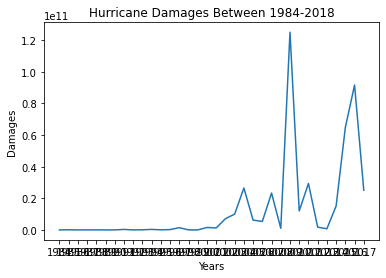

In [12]:
#line graph for damages between 1984-2018
updated_years = list(map(str, range(1984,2018)))
plt.plot(updated_years, updated_damages)
plt.title('Hurricane Damages Between 1984-2018')
plt.xlabel('Years')
plt.ylabel('Damages')

plt.show()

In [13]:
#Top 10 Highest Winds including the hurrican names
df_winds = pd.DataFrame({'Names' : names, 'Max Sustained Winds': max_sustained_winds})
top_winds=df_winds.sort_values(by=['Max Sustained Winds'], ascending= False)
top_winds.head(10)


,Names,Max Sustained Winds
17,Allen,190
27,Wilma,185
18,Gilbert,185
6,Labor Day,185
31,Irma,180
26,Rita,180
21,Mitch,180
16,David,175
15,Anita,175
25,Katrina,175


In [14]:
#Hurricane with the highest mortality rate
df_mortality = pd.DataFrame({'Names' : names, 'Deaths': deaths})
highest_mortality=df_mortality.sort_values(by=['Deaths'], ascending= False)
highest_mortality.head(1)

,Names,Deaths
21,Mitch,19325
